<a href="https://colab.research.google.com/github/codithj/stock_prediction_with_ml/blob/main/preprocessing_indexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 연동

In [1]:
import os
print(os.getcwd())
!ls

/content
sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


라이브러리 임포팅

In [3]:
import os
import sys
import warnings
if not sys.warnoptions:
  warnings.simplefilter('ignore')
import time
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

SnP500과 인덱스 5개 불러오기

In [4]:
# SnP500 
idx_snp500 = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_snp500.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)

# 10년 채권
idx_bond = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_bond.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)
# 유로/달러 환율
idx_eurodollar = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_eurodollar.csv",
                              usecols=[1,2,3,4,5],
                              index_col=[0],
                              parse_dates=True)
# gbp/달러 환율
idx_gbpdollar = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_gbpdollar.csv",
                              usecols=[1,2,3,4,5],
                              index_col=[0],
                              parse_dates=True)
# 금 가격
idx_gold = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_gold.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)
# 은 가격
idx_silver = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_silver.csv",
                          usecols=[1,2,3,4,5],
                          index_col=[0],
                          parse_dates=True)


인덱스 크기 확인

In [5]:
print('snp500 - 데이터 크기:', len(idx_snp500))
print('10년 채권 - 데이터 크기:', len(idx_bond))
print('유로/달러 환율 - 데이터 크기:', len(idx_eurodollar))
print('gbp/달러 환율 - 데이터 크기: ', len(idx_gbpdollar))
print('금 가격 - 데이터 크기:', len(idx_gold))
print('은 가격 - 데이터 크기:', len(idx_silver))

snp500 - 데이터 크기: 757
10년 채권 - 데이터 크기: 757
유로/달러 환율 - 데이터 크기: 757
gbp/달러 환율 - 데이터 크기:  757
금 가격 - 데이터 크기: 757
은 가격 - 데이터 크기: 757


종가('Close')로 결측치를 보간하기

In [6]:
snp500 = idx_snp500['close']
count = 0
for t in snp500:
  t = t.replace(',', '')
  snp500[count] = t
  count += 1

bond = idx_bond['close']
eurodollar = idx_eurodollar['close']
gbpdollar = idx_gbpdollar['close']
gold = idx_gold['close']
silver = idx_silver['close']

In [7]:
list = [snp500, bond, eurodollar, gbpdollar, gold, silver]
list_cols = ['snp500', 'bond', 'eurodollar', 'gbpdollar', 'gold', 'silver']

In [8]:
def check_null(list, list_cols):
  for i, name in zip(list, list_cols):
    print(name, 'checking ...')
    print(i.isnull().sum())


In [9]:
check_null(list, list_cols)

snp500 checking ...
0
bond checking ...
8
eurodollar checking ...
21
gbpdollar checking ...
21
gold checking ...
8
silver checking ...
8


In [10]:
def interpolate(df):
    print('before:', df.isnull().sum())
    df = df.interpolate(method='time')
    print('after:',df[df.isna()])
    print('after:',df.isnull().sum())
    return df
    
for item in list:
  item = interpolate(item)

before: 0
after: Series([], Name: close, dtype: object)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0
before: 21
after: Series([], Name: close, dtype: float64)
after: 0
before: 21
after: Series([], Name: close, dtype: float64)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0


before: 0
after: Series([], Name: close, dtype: float64)
after: 0


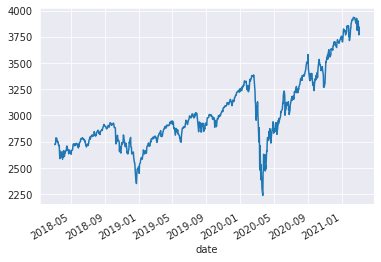

In [11]:
snp500 = snp500.astype(np.float64)
snp500 = interpolate(snp500)
snp500.plot()

before: 8
after: Series([], Name: close, dtype: float64)
after: 0


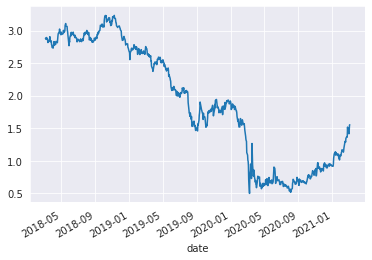

In [12]:
bond = interpolate(bond)
bond.plot()

before: 21
after: Series([], Name: close, dtype: float64)
after: 0


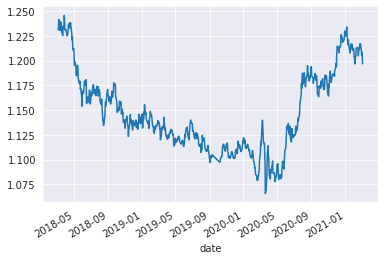

In [13]:
eurodollar = interpolate(eurodollar)
eurodollar.plot()

before: 21
after: Series([], Name: close, dtype: float64)
after: 0


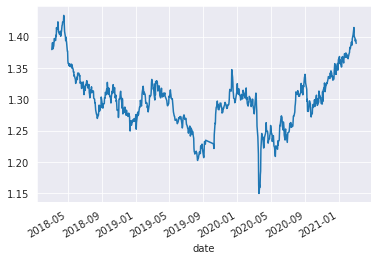

In [14]:
gbpdollar = interpolate(gbpdollar)
gbpdollar.plot()

before: 8
after: Series([], Name: close, dtype: float64)
after: 0


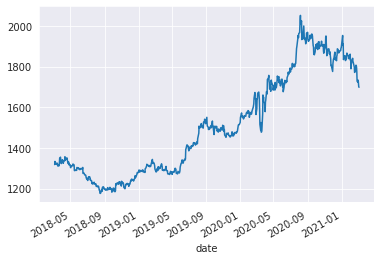

In [15]:
gold = interpolate(gold)
gold.plot()

before: 8
after: Series([], Name: close, dtype: float64)
after: 0


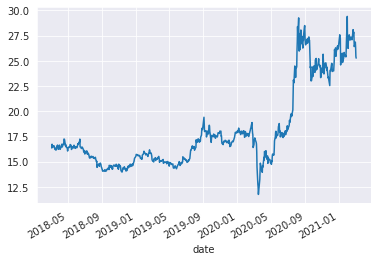

In [16]:
silver = interpolate(silver)
silver.plot()

정규화

In [17]:
snp500 /= 1000
bond /= 1000
eurodollar /= 1000
gbpdollar /= 1000
gold /= 1000
silver /= 1000

snp500 = snp500.values.reshape(-1,1)
bond = bond.values.reshape(-1,1)
eurodollar = eurodollar.values.reshape(-1,1)
gbpdollar = gbpdollar.values.reshape(-1,1)
gold = gold.values.reshape(-1,1)
silver = silver.values.reshape(-1,1)
